In [2]:
import pandas as pd 
cleaned_data=pd.read_csv('cleaned_dataset.csv')
cleaned_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,9223372036854775807,4/4/2019 12:01,770,4/25/2019 14:35,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,9223372036854775807,4/9/2019 13:04,235,4/25/2019 8:15,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,9223372036854775807,4/9/2019 17:42,1,4/25/2019 11:58,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,9223372036854775807,4/10/2019 0:31,486,4/25/2019 7:36,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,9223372036854775807,4/12/2019 20:10,565,4/25/2019 10:40,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,4/29/2019 7:28,451,4/30/2019 6:02,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,16191667,11763428,17883703,19678161,526609673,9197207,3264510,13487416,57628851,574175259
149997,7349883264234609664,4/29/2019 7:28,483,4/30/2019 10:41,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,13877234,8288284,19350146,21293148,626893062,4735033,712180387,2457758,39135081,666648844
149998,9223372036854775807,4/29/2019 7:28,283,4/30/2019 10:46,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,22660510,1855903,9963942,5065760,553539484,13394316,121100856,11314729,34912224,592786405
149999,9223372036854775807,4/29/2019 7:28,696,4/30/2019 10:40,327,97910,208202101098075,33619622058,86186204011457,L88342B,...,8817106,8305402,3322253,13172589,352536971,2529475,814713113,1406930,29626096,371895920


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

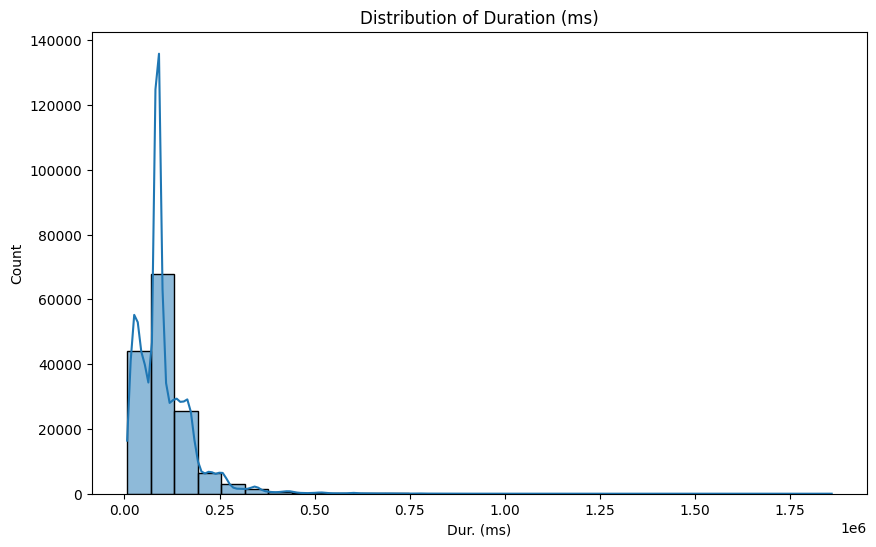

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Dur. (ms)'], bins=30, kde=True)
plt.title('Distribution of Duration (ms)')
plt.show()

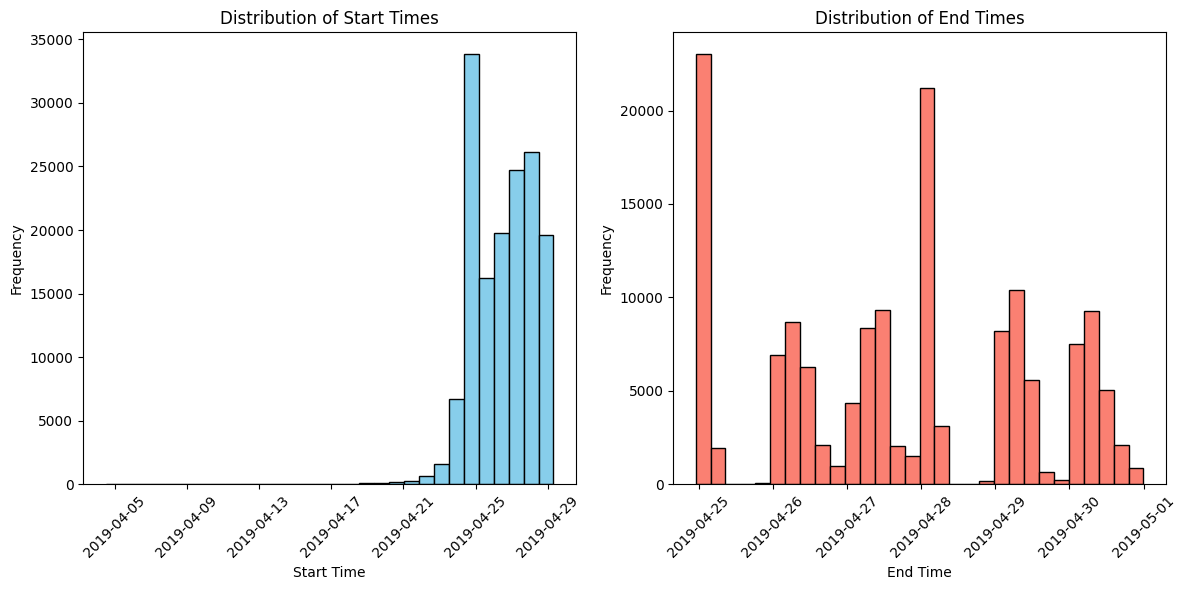

In [5]:
# Convert 'Start' and 'End' to datetime
cleaned_data['Start'] = pd.to_datetime(cleaned_data['Start'])
cleaned_data['End'] = pd.to_datetime(cleaned_data['End'])

# Plot histograms for 'Start' and 'End'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(cleaned_data['Start'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Start Times')
plt.xlabel('Start Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.hist(cleaned_data['End'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of End Times')
plt.xlabel('End Time')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [6]:
# Detecting the outliers present in the dataset 

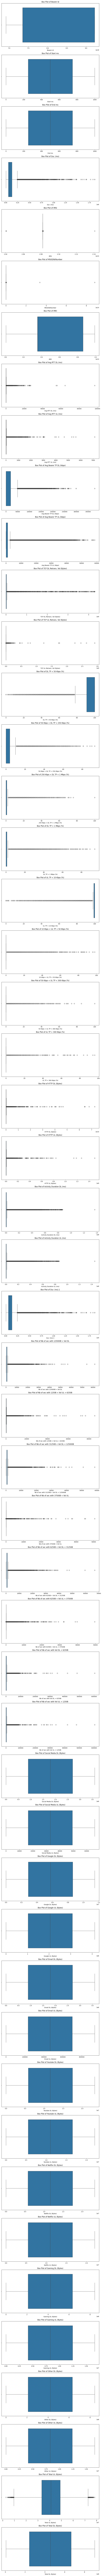

In [7]:
# Select only numeric columns
numeric_columns = cleaned_data.select_dtypes(include=['number']).columns
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 5 * len(numeric_columns)))
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=cleaned_data[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

In [8]:
cleaned_data.dtypes

Bearer Id                                            int64
Start                                       datetime64[ns]
Start ms                                             int64
End                                         datetime64[ns]
End ms                                               int64
Dur. (ms)                                            int64
IMSI                                                 int64
MSISDN/Number                                        int64
IMEI                                                 int64
Last Location Name                                  object
Avg RTT DL (ms)                                      int64
Avg RTT UL (ms)                                      int64
Avg Bearer TP DL (kbps)                              int64
Avg Bearer TP UL (kbps)                              int64
TCP DL Retrans. Vol (Bytes)                          int64
TCP UL Retrans. Vol (Bytes)                          int64
DL TP < 50 Kbps (%)                                  int

In [9]:
cleaned_data

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,9223372036854775807,2019-04-04 12:01:00,770,2019-04-25 14:35:00,662,1823652,208201448079117,33664962239,35521209507511,9.16456699548519E+015,...,15854611,2501332,8198936,9656251,278082303,14344150,171744450,8814393,36749741,308879636
1,9223372036854775807,2019-04-09 13:04:00,235,2019-04-25 08:15:00,606,1365104,208201909211140,33681854413,35794009006359,L77566A,...,20247395,19111729,18338413,17227132,608750074,1170709,526904238,15055145,53800391,653384965
2,9223372036854775807,2019-04-09 17:42:00,1,2019-04-25 11:58:00,652,1361762,208200314458056,33760627129,35281510359387,D42335A,...,19725661,14699576,17587794,6163408,229584621,395630,410692588,4215763,27883638,279807335
3,9223372036854775807,2019-04-10 00:31:00,486,2019-04-25 07:36:00,171,1321509,208201402342131,33750343200,35356610164913,T21824A,...,21388122,15146643,13994646,1097942,799538153,10849722,749039933,12797283,43324218,846028530
4,9223372036854775807,2019-04-12 20:10:00,565,2019-04-25 10:40:00,954,1089009,208201401415120,33699795932,35407009745539,D88865A,...,15259380,18962873,17124581,415218,527707248,3529801,550709500,13910322,38542814,569138589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7277825670196679680,2019-04-29 07:28:00,451,2019-04-30 06:02:00,214,81230,208202201200072,33650688697,35483109451938,D20434A,...,16191667,11763428,17883703,19678161,526609673,9197207,3264510,13487416,57628851,574175259
149997,7349883264234609664,2019-04-29 07:28:00,483,2019-04-30 10:41:00,187,97970,208201908153249,33663449963,35660508296467,D10223C,...,13877234,8288284,19350146,21293148,626893062,4735033,712180387,2457758,39135081,666648844
149998,9223372036854775807,2019-04-29 07:28:00,283,2019-04-30 10:46:00,810,98249,208201711161187,33621890103,35721209870907,T51102A,...,22660510,1855903,9963942,5065760,553539484,13394316,121100856,11314729,34912224,592786405
149999,9223372036854775807,2019-04-29 07:28:00,696,2019-04-30 10:40:00,327,97910,208202101098075,33619622058,86186204011457,L88342B,...,8817106,8305402,3322253,13172589,352536971,2529475,814713113,1406930,29626096,371895920


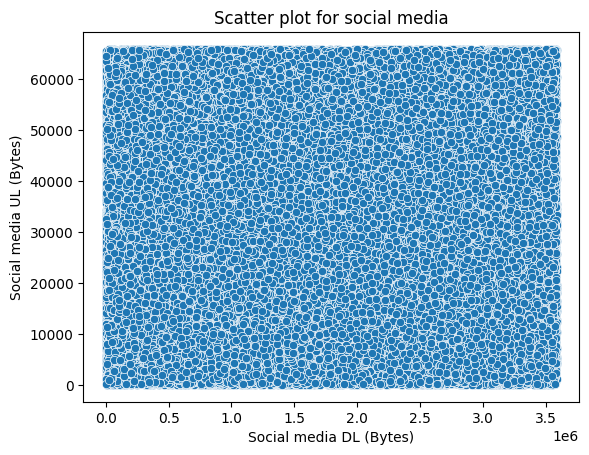

In [11]:
# Scatter plot for social media
sns.scatterplot(x='Social Media DL (Bytes)',y='Social Media UL (Bytes)',data=cleaned_data)
plt.title('Scatter plot for social media')
plt.xlabel('Social media DL (Bytes)')
plt.ylabel('Social media UL (Bytes)')
plt.show()